<a href="https://colab.research.google.com/github/Japjotongithub/Stock-Price-Ensemble-Model/blob/main/Ensemble_Model_for_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
# Load dataset
df = pd.read_csv('/content/stock price data.csv')

# Encode categorical variable
le = LabelEncoder()
df['Industry_type'] = le.fit_transform(df['Industry_type'])

# Define features and target
X = df.drop(columns=['Date', 'next_day_open_price'],axis=1)
y = df['next_day_open_price']
print(X.head())


   Close/Last    Volume    Open    PPI  Industry_type       CPI  FEDFUNDS  \
0      39.850   6193752  40.060  210.0              0 -0.562499  0.115000   
1      40.605   6766674  40.215  210.0              0 -0.564303  0.117000   
2      40.425   8594036  40.500  208.5              0 -0.567010  0.120000   
3      40.185   7639786  40.345  208.5              0 -0.563900  0.119677   
4      40.235  11201316  40.210  208.5              0 -0.560789  0.119355   

   Unemployment_Rate    GDP  Month  DayOfWeek  DayOfMonth  WeekOfYear  
0                5.6  17.93     11          2          26          48  
1                5.6  17.93     11          4          28          48  
2                5.6  17.93     12          0           1          49  
3                5.6  17.93     12          1           2          49  
4                5.6  17.93     12          2           3          49  


Splitting into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
print(X.shape,X_train.shape,X_test.shape)

(9316, 13) (7452, 13) (1864, 13)


Define the base model

In [ ]:
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boost": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=7,
        min_samples_split=2,
        min_samples_leaf=1,
        subsample=0.9,
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=7,
        subsample=0.9,
        colsample_bytree=0.9,
        min_child_weight=1,
        random_state=42,
        n_jobs=-1
    )
}




🔎 Target variable stats:
count    9316.000000
mean      118.566488
std       138.796468
min         0.481300
25%        27.946875
50%        64.281250
75%       143.385000
max       692.350000
Name: next_day_open_price, dtype: float64

📐 X shape: (9316, 13), Train shape: (7452, 13), Test shape: (1864, 13)

🔍 Performing cross-validation and generating predictions...

🔧 Training Linear Regression...
   📊 Cross-validated RMSE: 0.90 (+/- 0.54)
   ✅ Linear Regression prediction sample: [102.84861714 102.30265822 106.35965606]
🔧 Training Random Forest...
   📊 Cross-validated RMSE: 18.63 (+/- 12.69)
   ✅ Random Forest prediction sample: [ 98.05921853  99.12245033 101.27827709]
🔧 Training Gradient Boost...
   📊 Cross-validated RMSE: 10.04 (+/- 7.76)
   ✅ Gradient Boost prediction sample: [101.68822865 102.03051141 106.00592056]
🔧 Training XGBoost...
   📊 Cross-validated RMSE: 12.97 (+/- 9.31)
   ✅ XGBoost prediction sample: [100.974754 102.04624  105.567024]

🔗 Combining predictions using wei

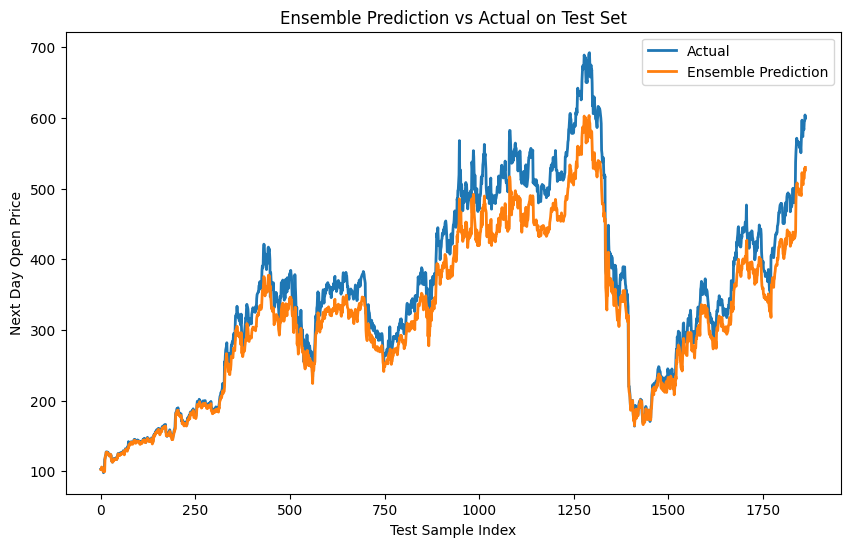

In [ ]:
###import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import clone

# Load dataset
df = pd.read_csv('/content/stock price data.csv')

# Encode categorical variable
le = LabelEncoder()
df['Industry_type'] = le.fit_transform(df['Industry_type'])

# Define features and target
X = df.drop(columns=['Date', 'next_day_open_price'], axis=1)
y = df['next_day_open_price']

# Show target distribution
print("\n🔎 Target variable stats:")
print(y.describe())

# Split into train/test (time-based split — no shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"\n📐 X shape: {X.shape}, Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Define models with pipelines (consistent)
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),  # optional, but can help sometimes
        ('regressor', RandomForestRegressor(
            n_estimators=300,
            max_depth=12,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            random_state=42
        ))
    ]),
    "Gradient Boost": Pipeline([
        ('scaler', StandardScaler()),  # optional
        ('regressor', GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=5,
            min_samples_split=5,
            min_samples_leaf=3,
            subsample=0.8,
            random_state=42
        ))
    ]),
    "XGBoost": Pipeline([
        ('scaler', StandardScaler()),  # optional
        ('regressor', XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            min_child_weight=3,
            random_state=42
        ))
    ])
}

# Store predictions for ensemble
predictions = []
cv_rmse_scores = []

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

print("\n🔍 Performing cross-validation and generating predictions...\n")

for name, model in models.items():
    print(f"🔧 Training {name}...")

    # Cross-validation on training data
    scores = cross_val_score(clone(model), X_train, y_train,
                             scoring='neg_mean_squared_error', cv=tscv)
    rmse_scores = np.sqrt(-scores)
    print(f"   📊 Cross-validated RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
    cv_rmse_scores.append(rmse_scores.mean())

    # Fit full model and predict on test set
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)
    print(f"   ✅ {name} prediction sample:", pred[:3])

# Weighted ensemble — lower RMSE -> higher weight (inverse of RMSE)
inverse_rmse = 1 / np.array(cv_rmse_scores)
weights = inverse_rmse / inverse_rmse.sum()

print(f"\n🔗 Combining predictions using weighted ensemble (weights: {weights.round(2)})...")
ensemble_preds = np.average(predictions, axis=0, weights=weights)
print("✅ Ensemble prediction sample:", ensemble_preds[:3])

# Evaluate on test set
print("\n📉 Test Set Performance:")
for name, pred in zip(models.keys(), predictions):
    rmse_individual = np.sqrt(mean_squared_error(y_test, pred))
    print(f"   📌 {name} Test RMSE: {rmse_individual:.2f}")

# Ensemble RMSE
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
print(f"\n📈 ✅ Ensemble Test RMSE: {ensemble_rmse:.2f}")

# Optional: Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(ensemble_preds, label='Ensemble Prediction', linewidth=2)
plt.title('Ensemble Prediction vs Actual on Test Set')
plt.xlabel('Test Sample Index')
plt.ylabel('Next Day Open Price')
plt.legend()
plt.show()


Ensemble prediction

Finding the ensemble RMSE


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.base import clone
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42
    ),
    "Gradient Boost": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=3,
        subsample=0.8,
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=3,
        random_state=42
    )
}

# Store predictions for ensemble
predictions = []

print("\n🔍 Performing cross-validation and generating predictions...\n")
for name, model in models.items():
    print(f"🔧 Training {name}...")
    scores = cross_val_score(clone(model), X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    print(f"   📊 Cross-validated RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)
    print(f"   ✅ {name} prediction sample:", pred[:3])

# Ensemble prediction
weights = [0.4, 0.2, 0.2, 0.2]
ensemble_preds = np.average(predictions, axis=0, weights=weights)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
print("\n📉 Test Set Performance:")
for name, pred in zip(models.keys(), predictions):
    print(f"   📌 {name} RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.2f}")
print(f"\n📈 ✅ Ensemble RMSE on test set: {ensemble_rmse:.2f}")



🔍 Performing cross-validation and generating predictions...

🔧 Training Linear Regression...
   📊 Cross-validated RMSE: 2.76 (+/- 0.54)
   ✅ Linear Regression prediction sample: [ 98.29961271 188.65005168 486.526339  ]
🔧 Training Random Forest...
   📊 Cross-validated RMSE: 3.47 (+/- 0.48)
   ✅ Random Forest prediction sample: [ 98.32569844 194.0772884  479.30488262]
🔧 Training Gradient Boost...
   📊 Cross-validated RMSE: 3.25 (+/- 0.83)
   ✅ Gradient Boost prediction sample: [ 97.97629989 189.67304381 482.58837275]
🔧 Training XGBoost...
   📊 Cross-validated RMSE: 3.67 (+/- 0.65)
   ✅ XGBoost prediction sample: [ 98.20165 191.3156  488.20755]

📉 Test Set Performance:
   📌 Linear Regression RMSE: 3.39
   📌 Random Forest RMSE: 3.84
   📌 Gradient Boost RMSE: 3.54
   📌 XGBoost RMSE: 3.85

📈 ✅ Ensemble RMSE on test set: 3.42


Actual vs Predicted Opening Price scatter plot

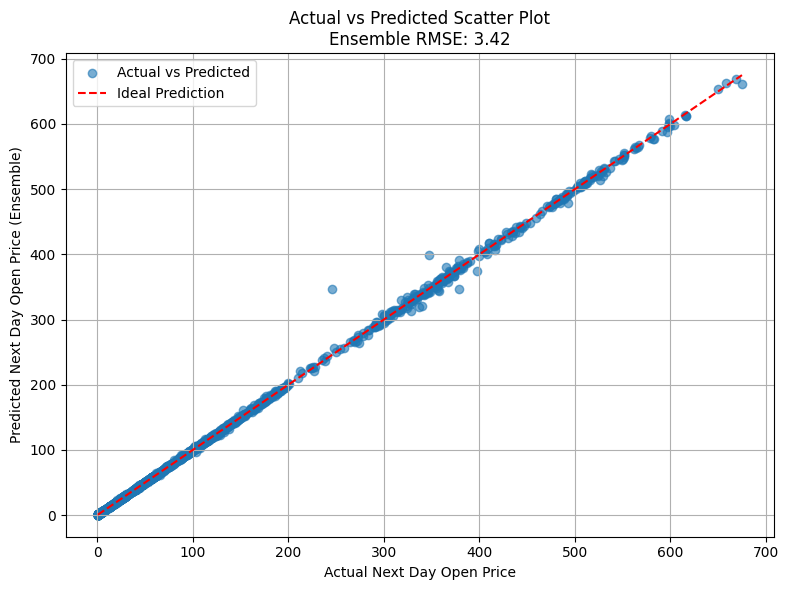

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
scatter_handle = plt.scatter(y_test, ensemble_preds, alpha=0.6, label='Actual vs Predicted')
line_handle = plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.xlabel('Actual Next Day Open Price')
plt.ylabel('Predicted Next Day Open Price (Ensemble)')
plt.title(f'Actual vs Predicted Scatter Plot\nEnsemble RMSE: {ensemble_rmse:.2f}')
plt.legend(handles=[scatter_handle, line_handle[0]], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Using Plotly For more interactive graph with Slicer

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Prepare a DataFrame for convenience
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': ensemble_preds
})

# Create the Plotly figure
fig = go.Figure()

# Add scatter points (actual vs predicted)
fig.add_trace(go.Scatter(
    x=results_df['Actual'],
    y=results_df['Predicted'],
    mode='markers',
    marker=dict(color='blue', size=7, opacity=0.7),
    name='Actual vs Predicted',
    text=[f"Index: {i}<br>Actual: {a:.2f}<br>Predicted: {p:.2f}"
          for i, (a, p) in enumerate(zip(results_df['Actual'], results_df['Predicted']))],
    hoverinfo='text'
))

# Add the ideal prediction line (y = x)
fig.add_trace(go.Scatter(
    x=[results_df['Actual'].min(), results_df['Actual'].max()],
    y=[results_df['Actual'].min(), results_df['Actual'].max()],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Ideal Prediction'
))

# Layout settings
fig.update_layout(
    title=f'Actual vs Predicted Scatter Plot<br>Ensemble RMSE: {ensemble_rmse:.2f}',
    xaxis_title='Actual Next Day Open Price',
    yaxis_title='Predicted Next Day Open Price (Ensemble)',
    legend=dict(x=0, y=1.1),
    height=600,
    width=800
)

# Show the interactive plot
fig.show()